In [2]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler         #Extracting Stock data from yahoo finance
stock = yf.Ticker("ICICIBANK.NS")
print(stock)
stock.history(period='5d')

yfinance.Ticker object <ICICIBANK.NS>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-06 00:00:00+05:30,941.000000,947.750000,937.400024,945.450012,10338367,0.0,0.0
2023-11-07 00:00:00+05:30,943.599976,950.450012,930.450012,948.099976,15704942,0.0,0.0
2023-11-08 00:00:00+05:30,948.450012,948.450012,934.099976,935.750000,17606074,0.0,0.0
2023-11-09 00:00:00+05:30,934.000000,942.349976,933.000000,937.349976,9406117,0.0,0.0
2023-11-10 00:00:00+05:30,934.900024,941.450012,932.400024,938.599976,9560455,0.0,0.0


In [3]:
df=stock.history(start='2000-11-01', end='2023-11-04', actions=False)   # Data Verification
print(df.shape)
df.head()

(5303, 5)


,Open,High,Low,Close,Volume
Date,,,,,
2002-07-01 00:00:00+05:30,18.391931,18.681360,17.957786,18.181437,2047540
2002-07-02 00:00:00+05:30,18.418245,19.996951,18.260374,19.352314,5546354
2002-07-03 00:00:00+05:30,19.339153,20.391624,19.279951,20.325844,5745267
2002-07-04 00:00:00+05:30,20.391632,20.838932,19.562811,19.819351,3896601
2002-07-05 00:00:00+05:30,19.602276,20.161402,19.497029,20.023266,3261038


In [4]:
print(df.isnull().sum())
df=df.drop(['Open','High','Volume','Low'],axis=1)   # Data Preprocessing
df.head()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


,Close
Date,
2002-07-01 00:00:00+05:30,18.181437
2002-07-02 00:00:00+05:30,19.352314
2002-07-03 00:00:00+05:30,20.325844
2002-07-04 00:00:00+05:30,19.819351
2002-07-05 00:00:00+05:30,20.023266


Text(0.5, 0, 'Time')

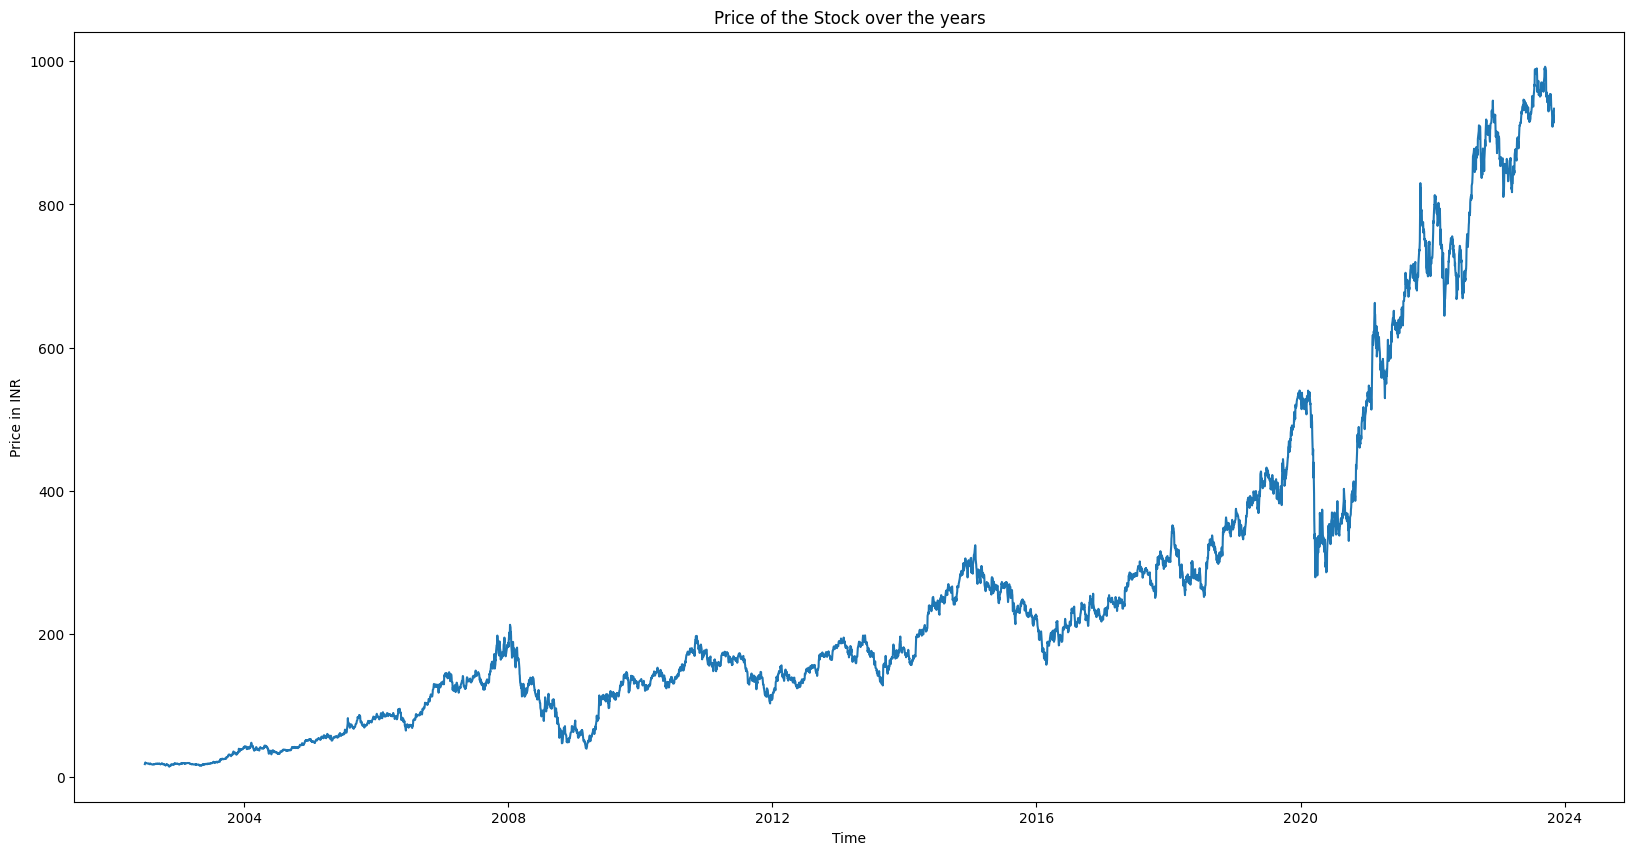

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title("Price of the Stock over the years")   #Plotting the Data
plt.plot(df['2000-11-01':'2023-11-04'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

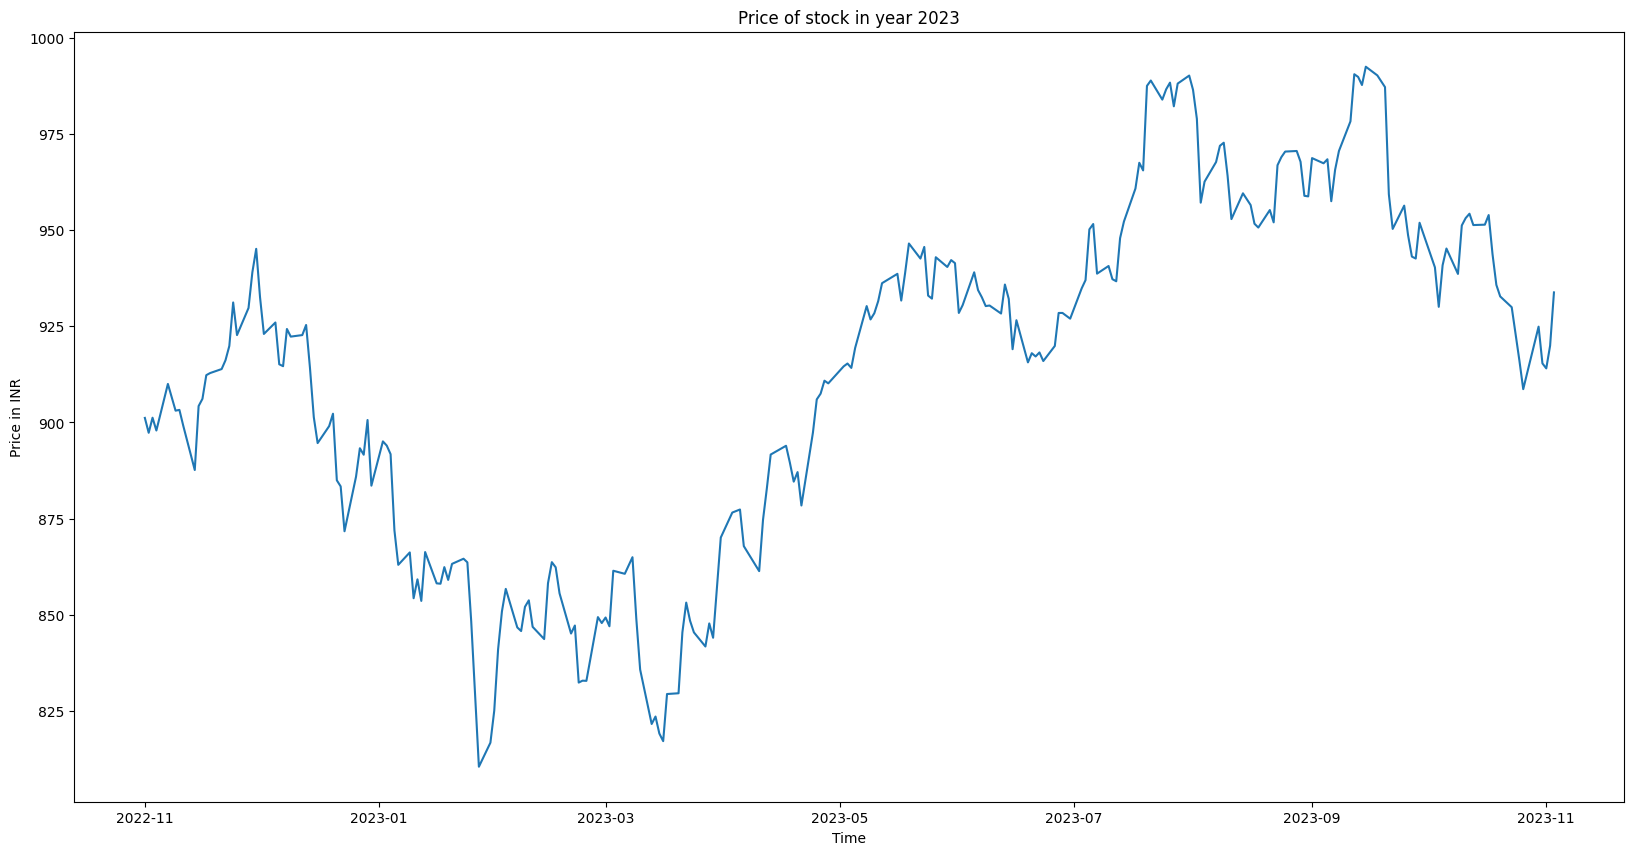

In [6]:
plt.figure(figsize=(20,10))
plt.title("Price of stock in year 2023")
plt.plot(df['2022-11-01':'2023-11-04'])   #Plotting 1 year data
plt.ylabel("Price in INR")
plt.xlabel("Time")

In [7]:
data=df.values
print(len(data)) #Data Segregation
data

5303


array([[ 18.18143654],
       [ 19.352314  ],
       [ 20.32584381],
       ...,
       [914.04998779],
       [919.95001221],
       [933.79998779]])

In [8]:
import math
train_len=math.ceil(len(data)*0.96)  #Determining Training Length
train_len

5091

In [9]:
min_max_scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=min_max_scalar.fit_transform(data)  #Scaling data to Decimals
print(len(scaled_data))
scaled_data

5303


array([[0.00371978],
       [0.00491711],
       [0.00591264],
       ...,
       [0.91982868],
       [0.92586201],
       [0.9400249 ]])

In [10]:
train_data=scaled_data[0:train_len,:]
print(len(train_data))                      #Storing training data
train_data

5091


array([[0.00371978],
       [0.00491711],
       [0.00591264],
       ...,
       [0.8884644 ],
       [0.87654705],
       [0.89105072]])

In [11]:
x_train=[]
y_train=[]
interval=60
for i in range(interval,len(train_data)):            #Determining the X_train and Y_train
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])

In [12]:
x_train

[array([0.00371978, 0.00491711, 0.00591264, 0.0053947 , 0.00560322,
        0.00528708, 0.00517272, 0.00509873, 0.00495075, 0.00495075,
        0.00464132, 0.00447316, 0.00460769, 0.00462788, 0.00470859,
        0.00456733, 0.00466151, 0.00417719, 0.00392831, 0.00359871,
        0.0042041 , 0.00368615, 0.00404267, 0.00460097, 0.00404939,
        0.0035718 , 0.0034709 , 0.00353144, 0.00339019, 0.00337673,
        0.00320184, 0.00319512, 0.00292605, 0.00292605, 0.00318166,
        0.00341037, 0.00328929, 0.00332965, 0.00320857, 0.00387449,
        0.00387449, 0.00392831, 0.00386104, 0.00381396, 0.00444626,
        0.00426464, 0.00401575, 0.00388122, 0.00398212, 0.00435208,
        0.00414356, 0.00414356, 0.00450007, 0.00450007, 0.0044059 ,
        0.0043319 , 0.00446643, 0.00454715, 0.00478931, 0.0040763 ]),
 array([0.00491711, 0.00591264, 0.0053947 , 0.00560322, 0.00528708,
        0.00517272, 0.00509873, 0.00495075, 0.00495075, 0.00464132,
        0.00447316, 0.00460769, 0.00462788, 0.

In [13]:
y_train

[0.0036928807949885793,
 0.003800506148305542,
 0.0035583491033423734,
 0.0033363752253984854,
 0.0036928807949885793,
 0.004002300760112836,
 0.004614417519051386,
 0.004614417519051386,
 0.004244455854634661,
 0.0044126229072440955,
 0.004392443641107498,
 0.003760149566473697,
 0.0035179905710691853,
 0.0033027379139939136,
 0.003679426650603288,
 0.003773599809976302,
 0.003773599809976302,
 0.0036525183618327014,
 0.0035179905710691853,
 0.0025560914138505007,
 0.002751164804789175,
 0.0022197651103970043,
 0.002616627261818943,
 0.001748905164855959,
 0.002145771217160584,
 0.002825156747584252,
 0.0032892876704913084,
 0.0029395072226525206,
 0.003275833526106017,
 0.0028117026031989605,
 0.00281842577450892,
 0.0026368123792795666,
 0.0026368123792795666,
 0.0018767097843095156,
 0.0013991256922378428,
 0.0014058508139891453,
 0.0008811791670102886,
 0.0,
 0.001062794512680985,
 0.0012780413184322274,
 0.0016480029828489558,
 0.0016480029828489558,
 0.0013251337494427657,
 0.00

In [14]:
import numpy as np
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))  #Data Reshaping
print(x_train.shape)
x_train

(5031, 60, 1)


array([[[0.00371978],
        [0.00491711],
        [0.00591264],
        ...,
        [0.00454715],
        [0.00478931],
        [0.0040763 ]],

       [[0.00491711],
        [0.00591264],
        [0.0053947 ],
        ...,
        [0.00478931],
        [0.0040763 ],
        [0.00369288]],

       [[0.00591264],
        [0.0053947 ],
        [0.00560322],
        ...,
        [0.0040763 ],
        [0.00369288],
        [0.00380051]],

       ...,

       [[0.85844271],
        [0.84982163],
        [0.8467282 ],
        ...,
        [0.90448948],
        [0.90778575],
        [0.89008717]],

       [[0.84982163],
        [0.8467282 ],
        [0.84104846],
        ...,
        [0.90778575],
        [0.89008717],
        [0.8884644 ]],

       [[0.8467282 ],
        [0.84104846],
        [0.85940626],
        ...,
        [0.89008717],
        [0.8884644 ],
        [0.87654705]]])

In [15]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax


In [16]:
model=Sequential()
# model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(150,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(75,return_sequences=True))
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=64))
# model.add(Dropout(0.2))
# model.add(LSTM(50,return_sequences=False))
model.add(Dense(50))
# model.add(drop)
# model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/200
40/40 [==============================] - 11s 12ms/step - loss: 0.0069
Epoch 2/200
40/40 [==============================] - 0s 9ms/step - loss: 2.3765e-04
Epoch 3/200
40/40 [==============================] - 0s 8ms/step - loss: 2.0412e-04
Epoch 4/200
40/40 [==============================] - 0s 8ms/step - loss: 1.9258e-04
Epoch 5/200
40/40 [==============================] - 0s 9ms/step - loss: 1.9805e-04
Epoch 6/200
40/40 [==============================] - 0s 8ms/step - loss: 1.9379e-04
Epoch 7/200
40/40 [==============================] - 0s 9ms/step - loss: 1.7526e-04
Epoch 8/200
40/40 [==============================] - 0s 9ms/step - loss: 1.7749e-04
Epoch 9/200
40/40 [==============================] - 0s 9ms/step - loss: 1.5997e-04
Epoch 10/200
40/40 [==============================] - 0s 9ms/step - loss: 1.5520e-04
Epoch 11/200
40/40 [==============================] - 0s 9ms/step - loss: 1.5729e-04
Epoch 12/200
40/40 [==============================] - 0s 9ms/step - loss: 1.

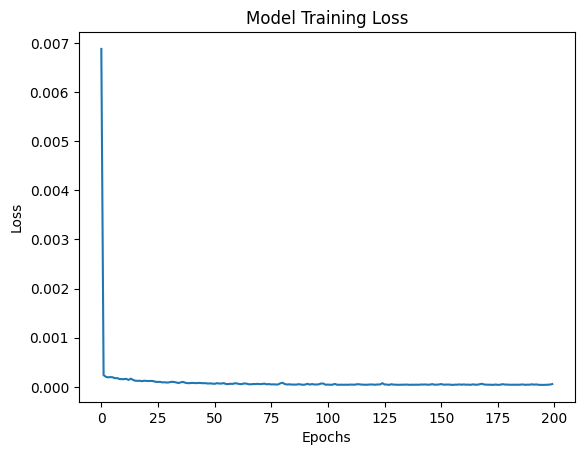

In [17]:
history=model.fit(x_train,y_train,batch_size=128,epochs=200)
import matplotlib.pyplot as plt

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [18]:
test_data=scaled_data[train_len-interval:,:]
x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):              #Preparing test Data
    x_test.append(test_data[i-interval:i,0])

In [19]:
y_test

array([[893.29699707],
       [891.61090088],
       [900.63659668],
       [883.57696533],
       [895.08233643],
       [893.99127197],
       [891.75964355],
       [871.97253418],
       [862.99639893],
       [866.21984863],
       [854.31781006],
       [859.22741699],
       [853.62359619],
       [866.3190918 ],
       [858.18603516],
       [858.08685303],
       [862.40130615],
       [859.07867432],
       [863.24432373],
       [864.58337402],
       [863.64111328],
       [848.31719971],
       [810.52832031],
       [816.77685547],
       [825.10827637],
       [841.02728271],
       [850.89605713],
       [856.74780273],
       [846.73028564],
       [845.78808594],
       [852.08618164],
       [853.77233887],
       [846.87902832],
       [843.7052002 ],
       [858.2355957 ],
       [863.69067383],
       [862.35174561],
       [855.60723877],
       [845.14331055],
       [847.22625732],
       [832.39825439],
       [832.89416504],
       [832.84460449],
       [849

In [20]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test

array([[[0.84104846],
        [0.85940626],
        [0.84556181],
        ...,
        [0.8884644 ],
        [0.87654705],
        [0.89105072]],

       [[0.85940626],
        [0.84556181],
        [0.86513675],
        ...,
        [0.87654705],
        [0.89105072],
        [0.89860682]],

       [[0.84556181],
        [0.86513675],
        [0.88319035],
        ...,
        [0.89105072],
        [0.89860682],
        [0.89688263]],

       ...,

       [[0.96387346],
        [0.96945178],
        [0.97467516],
        ...,
        [0.91849933],
        [0.93092386],
        [0.92115804]],

       [[0.96945178],
        [0.97467516],
        [0.97898573],
        ...,
        [0.93092386],
        [0.92115804],
        [0.91982868]],

       [[0.97467516],
        [0.97898573],
        [0.97980379],
        ...,
        [0.92115804],
        [0.91982868],
        [0.92586201]]])

In [21]:
predictions=model.predict(x_test)
predictions=min_max_scalar.inverse_transform(predictions) #Predictions
predictions[0:5]

7/7 [==============================] - 1s 5ms/step


array([[890.61523],
       [895.38196],
       [893.5274 ],
       [903.1563 ],
       [885.0911 ]], dtype=float32)

In [22]:
rmse_error=np.sqrt(np.mean(predictions-y_test)**2)   # Root Mean Square Error
rmse_error

2.014370900280071

In [23]:
train_data=df[0:train_len]
valid_data=df[train_len:]                     #Combining Actual and Predicted Values
valid_data['predictions']=predictions
valid_data.head()

<ipython-input-23-14b6842f3aeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predictions']=predictions


,Close,predictions
Date,,
2022-12-27 00:00:00+05:30,893.296997,890.615234
2022-12-28 00:00:00+05:30,891.610901,895.381958
2022-12-29 00:00:00+05:30,900.636597,893.527405
2022-12-30 00:00:00+05:30,883.576965,903.156311
2023-01-02 00:00:00+05:30,895.082336,885.091125


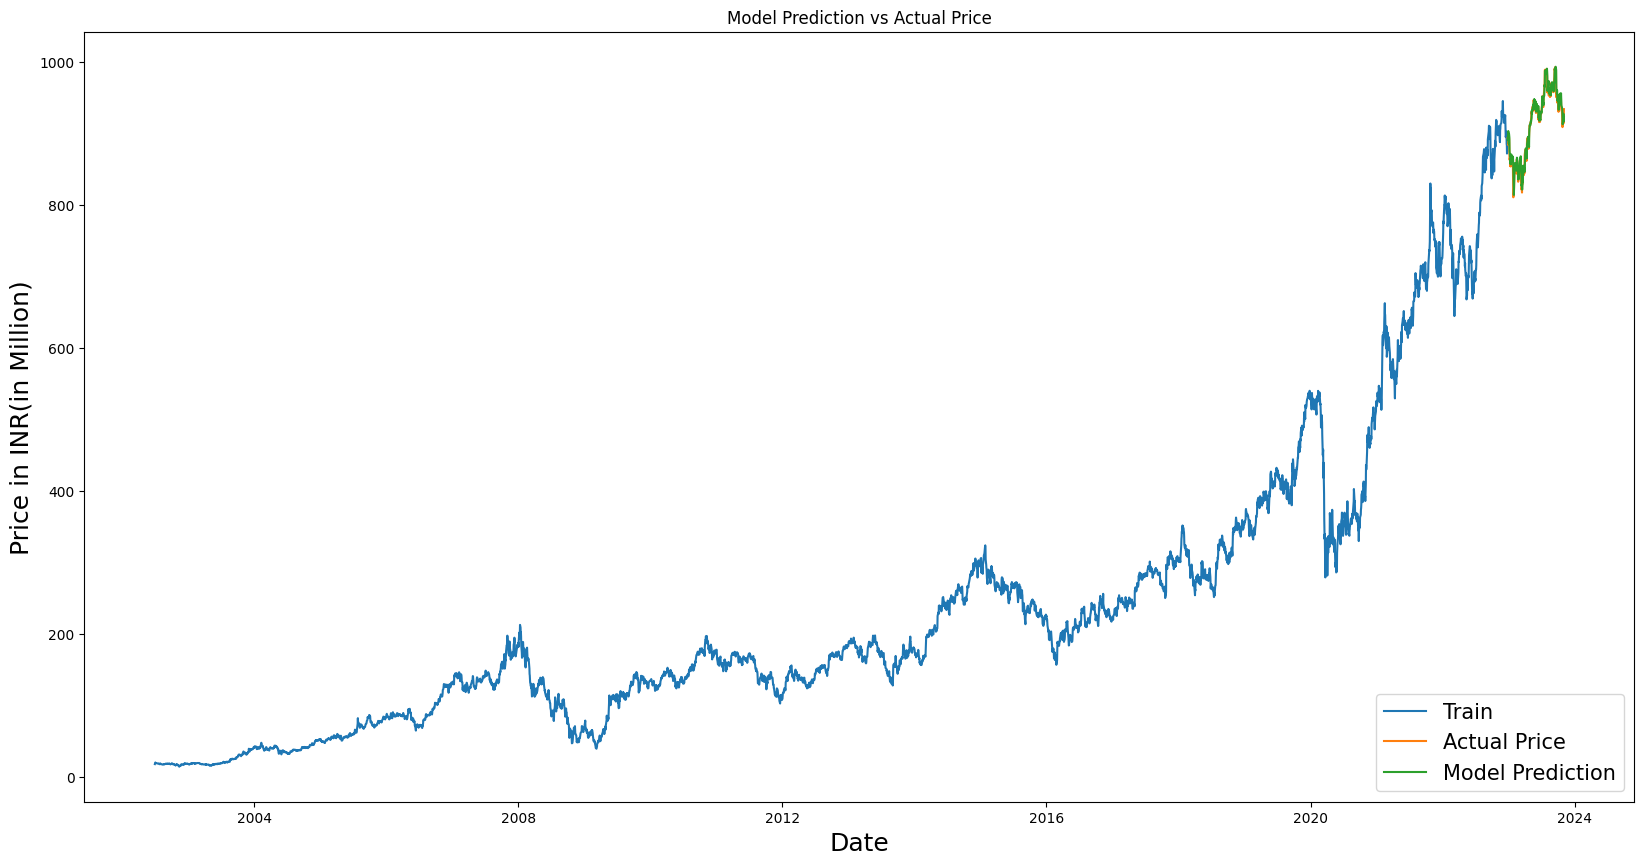

In [24]:
plt.figure(figsize=(20,10))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

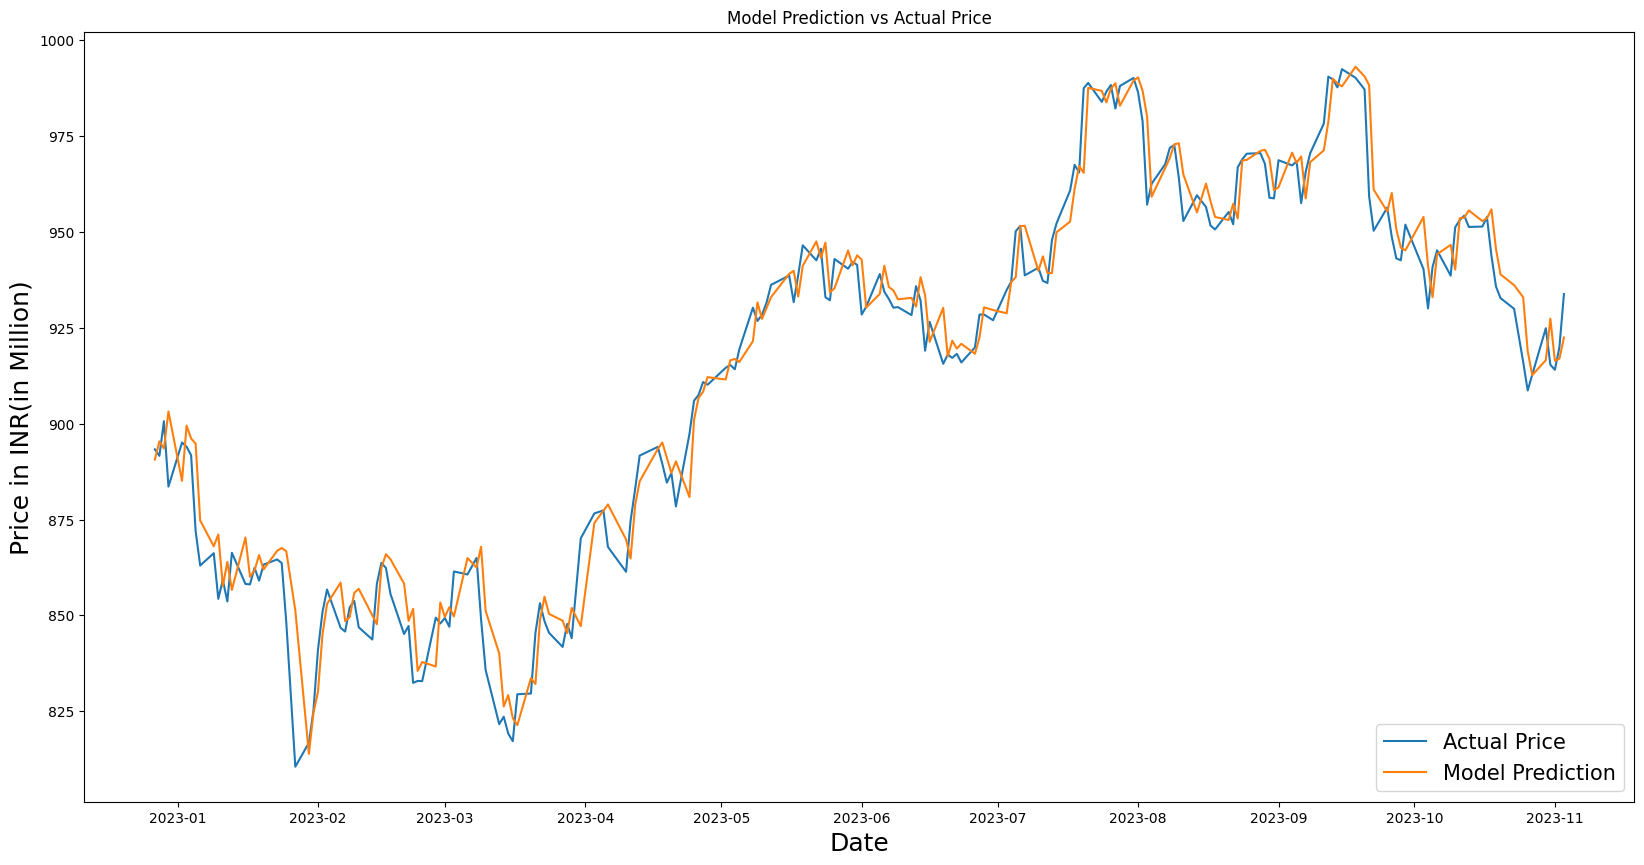

In [25]:
plt.figure(figsize=(20,10))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])                                                        #Comparison Graph
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [26]:
close = valid_data['Close']
prediction = valid_data['predictions']
count = 0
risk = 0.01
for i in range(len(valid_data)):
  allowed_error = close[i]*risk
  difference = abs(prediction[i]-close[i])
  if difference < allowed_error:
    count=count+1
Accuracy = (count/len(valid_data))*100
print("Accuarcy: ",Accuracy)

Accuarcy:  74.52830188679245
